# Guided Project: Clean And Analyze Employee Exit Surveys

In this guided project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland))(DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and will start analyzing the first question.


In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Read the data
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

# Information about dataframes
print('\n- Information about dete survey:\n')
print(dete_survey.info())
print('\n- First 5 rows of the dete survey:\n\n', dete_survey.head())
print('\n- Information about tafe survey:\n')
print(tafe_survey.info())
print('\n- First 5 rows of the tafe survey:\n\n', tafe_survey.head())

# Exploring the dataframes
print('\n\tRECURRENT REASON FOR RESIGNING')
print('\n- Number of unique values in the SeperationType column of dete_survey:\n\n', dete_survey['SeparationType'].value_counts(ascending=True))
print('\n- Number of unique values in the Reason for ceasing employment column of tafe_survey:\n\n', tafe_survey['Reason for ceasing employment'].value_counts(ascending=True))

print('\n\tMISSING VALUES')
print('\n- Number of missing values in dete_survey per columns:\n\n', dete_survey.isnull().sum())

print('\n- Number of missing values in tafe_survey per columns:\n\n', tafe_survey.isnull().sum())



- Information about dete survey:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career mov

From the information gather above, we notice that:
- there are missing values in some key and non-key columns.
- the reasons for resigning are almost the same in the two dataframes with differents frequencies.
- we have the lenght in year of the person's employment in the tafe_survey but we don't have it in the dete_survey. But, we do have start and end dates; which means we would be able to calculate the lenght in year and calculate in average, after how many years people resign for whatever reasons. 

Additional obeservations:
- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

**IDENTIFY MISSING VALUES AND DROP UNNECESSARY COLUMNS**

To start, we will handle the issues of missing values not being representing as NaN and after drop columns we know we don't need for our analysis.

In [2]:
dete_survey = pd.read_csv('dete_survey.csv',na_values='Not Stated')

# Drop columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

print('\n- First 5 rows of the dete survey:\n\n', dete_survey_updated.head())
print('\n- First 5 rows of the tafe survey:\n\n', tafe_survey_updated.head())



- First 5 rows of the dete survey:

    ID                    SeparationType Cease Date  DETE Start Date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   Role Start Date                                      Position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Str

**CLEAN COLUMN NAMES**

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis:

| dete_survey      | tafe_survey | Definition     |
| :---:        |    :----:   |          :---: |
| ID      | Record ID	       | 	An id used to identify the participant of the survey  |
| SeparationType   | Reason for ceasing employment        | The reason why the participant's employment ended|
| Cease Date| CESSATION YEAR|The year or month the participant's employment ended   |
| DETE Start Date	   |         | The year the participant began employment with the DETE      |
|       | LengthofServiceOverall. Overall Length of Service at Institute (in years)| The length of the person's employment (in years) |
| Age   | CurrentAge. Current Age| The age of the participant|
| Gender   | Gender. What is your Gender? | The gender of the participant    |

In [3]:
# Update dete_survey_updated columns names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
print('\n Column names of dete_survey_updated are:\n', dete_survey_updated.columns)

# Rename tafe_survey_updated columns names
col_renaming = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(col_renaming, axis=1, inplace=True)
print('\n Column names of tafe_survey_updated are:\n', tafe_survey_updated.columns)

print('\n- First 5 rows of the dete survey:\n\n', dete_survey_updated.head())
print('\n- First 5 rows of the tafe survey:\n\n', tafe_survey_updated.head())



 Column names of dete_survey_updated are:
 Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

 Column names of tafe_survey_updated are:
 Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Ca

We renamed the remaining columns in the dete_survey_updated dataframe following those criteria:
- Make all the capitalization lowercase.
- Remove any trailing whitespace from the end of the strings.
- Replace spaces with underscores ('_').

We updated the names of the columns in the tafe_survey_updated dataframe to match the following:
- 'Record ID': 'id'
- 'CESSATION YEAR': 'cease_date'
- 'Reason for ceasing employment': 'separationtype'
- 'Gender. What is your Gender?': 'gender'
- 'CurrentAge. Current Age': 'age'
- 'Employment Type. Employment Type': 'employment_status'
- 'Classification. Classification': 'position'
- 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
- 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'

**FILTER THE DATA**

In [4]:
# Review unique values in the separationtype columns for both dataframes
print('\n- Unique values in separationtype column of dete_survey_updated:\n', dete_survey_updated['separationtype'].value_counts())
print('\n- Unique values in separationtype column of tafe_survey_updated:\n', tafe_survey_updated['separationtype'].value_counts())

# select only the data for survey respondents who have a Resignation separation type
dete_resignations = dete_survey_updated.copy()
dete_resignations = dete_resignations[(dete_resignations['separationtype'] == 'Resignation-Other reasons') | (dete_resignations['separationtype'] == 'Resignation-Other employer') | (dete_resignations['separationtype'] == 'Resignation-Move overseas/interstate')]
tafe_resignations = tafe_survey_updated.copy()
tafe_resignations = tafe_resignations[tafe_resignations['separationtype'] == 'Resignation']

print('\n- First 5 rows of resignations data from dete_survey_updated:\n\n', dete_resignations.head())
print('\n- First 5 rows of resignations data from tafe_survey_updated:\n\n', tafe_resignations.head())



- Unique values in separationtype column of dete_survey_updated:
 Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

- Unique values in separationtype column of tafe_survey_updated:
 Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

- First 5 rows of resignations data from dete_survey_updated:

     id                        separationtype cease_date  dete_start_date  \
3    4             Resignation-Other reasons    05/2012           2

In each of dataframes, we selected only the data for survey respondents who have a Resignation separation type.

**VERIFY THE DATA**

Let's verify that the data doesn't contain any major inconsistencies.

In [5]:
# Clean the cease_date column in the dete_resignation
print('\n- Unique values in the cease_date column of the dete_resignation dataframe:\n', dete_resignations['cease_date'].value_counts())

# Extract year in the cease_date column
#dete_resignations_1 = dete_resignations.set_index('id')
pattern = r"([1-2][0-9]{3})"
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern)
# years['Years'] = years['Years'].astype(float)
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

print(dete_resignations['cease_date'])

# Unique values from the cease_date and dete_start_date columns
print('\n- Unique values in the dete_start_date column of the dete_resignation dataframe:\n', dete_resignations['dete_start_date'].value_counts())
print('\n- Unique values in the cease_date column of the tafe_resignation dataframe:\n', tafe_resignations['cease_date'].value_counts())



- Unique values in the cease_date column of the dete_resignation dataframe:
 2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2012      1
2010         1
07/2006      1
Name: cease_date, dtype: int64
3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
        ...  
808    2013.0
815    2014.0
816    2014.0
819    2014.0
821    2013.0
Name: cease_date, Length: 311, dtype: float64

- Unique values in the dete_start_date column of the dete_resignation dataframe:
 2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986

**CREATE A NEW COLUMN**

Let's create an institute_service column in dete_resignations

In [6]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
print('\n- Unique values in the institute_service column of the dete_resignation dataframe:\n', dete_resignations['institute_service'].value_counts())



- Unique values in the institute_service column of the dete_resignation dataframe:
 5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64


**IDENTIFY DISSATISFIED EMPLOYEES**

Next, we'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. 

1. tafe_survey_updated:
    - Contributing Factors. Dissatisfaction
    - Contributing Factors. Job Dissatisfaction
    

2. dete_survey_updated:
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload
    
If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

In [7]:
# View of the values of the 2 dissatisfied columns of tafe_resignations
print('\n- Unique values in the Contributing Factors. Dissatisfaction column of the tafe_resignations dataframe:\n', tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print('\n- Unique values in the Contributing Factors. Job Dissatisfaction column of the tafe_resignations dataframe:\n', tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

# Update those columns to contains bools or NaN only
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

col = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations[col] = tafe_resignations[col].applymap(update_vals)
# tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].apply(update_vals)
# tafe_resignations['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].apply(update_vals)

print('\n- (Update) Unique values in the Contributing Factors. Dissatisfaction column of the tafe_resignations dataframe:\n', tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print('\n- (Update) Unique values in the Contributing Factors. Job Dissatisfaction column of the tafe_resignations dataframe:\n', tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

# Create new column in both dataframes
col1 = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
col2 = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']

tafe_resignations['dissatisfied'] = tafe_resignations[col1].any(axis=1, skipna=False)
dete_resignations['dissatisfied'] = dete_resignations[col2].any(axis=1, skipna=False)

# Copy to avoid the SettingWithCopy Warning
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

print('\n- Unique values in the dissatisfied column of the tafe_resignations_up dataframe:\n', tafe_resignations_up['dissatisfied'].value_counts(dropna=False))
print('\n- Unique values in the dissatisfied column of the dete_resignations_up dataframe:\n', dete_resignations_up['dissatisfied'].value_counts(dropna=False))



- Unique values in the Contributing Factors. Dissatisfaction column of the tafe_resignations dataframe:
 -                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

- Unique values in the Contributing Factors. Job Dissatisfaction column of the tafe_resignations dataframe:
 -                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

- (Update) Unique values in the Contributing Factors. Dissatisfaction column of the tafe_resignations dataframe:
 False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

- (Update) Unique values in the Contributing Factors. Job Dissatisfaction column of the tafe_resignations dataframe:
 False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

- Unique val

**COMBINE THE DATA**

In [10]:
# Add new column to both dataframe to distinguish them
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

# Combine of the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up])
# print(combined['institute'].value_counts())
# print(combined.info())
#print('\nColumn names 1:\n', combined.columns)

# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh=500, axis=1)
#print('\nColumn names 2:\n', combined_updated.columns)



Column names 1:
 Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'dissatisfied',
       'institute', 'Institute', 'WorkArea',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-em

After combining both dataframes, we dropped any columns with less than 500 non null values. Which left us with the most important ones.

**CLEAN THE SERVICE COLUMN**

In [31]:
# Extract pattern and convert to float 
combined_updated.loc[:, 'institute_service'] = combined_updated['institute_service'].astype(str)
pattern = r"([0-9]{2})"
combined_updated.loc[:, 'institute_service'] = combined_updated['institute_service'].str.extract('(\d+)', expand=False)
# print(years.value_counts(dropna=False))
# print(combined_updated['institute_service'].value_counts())
combined_updated.loc[:, 'institute_service'] = combined_updated['institute_service'].astype(float)
#print(combined_updated['institute_service'].value_counts(dropna=False))

# Map each value to one of the career stage definitions
def map_values(elem):
    if elem < 3:
        return 'New'
    elif 3 <= elem <= 6:
        return 'Experienced'
    elif 7 <= elem <= 10:
        return 'Established'
    elif elem >= 11:
        return 'Veteran'
    elif pd.isnull(elem):
        return np.nan
    
combined_updated.loc[:, 'service_cat'] = combined_updated['institute_service'].apply(map_values)
print(combined_updated['service_cat'])

3      Established
5          Veteran
8      Experienced
9          Veteran
11     Experienced
          ...     
696    Experienced
697            New
698            NaN
699    Experienced
701    Experienced
Name: service_cat, Length: 651, dtype: object


We categorized the values in the institute_service column using the definitions below:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

**PERFORM INITIAL ANALYSIS**

In [36]:
%matplotlib inline


- Unique values in the dissatisfied column of the combined updated dataframe:
 False    411
True     240
Name: dissatisfied, dtype: int64


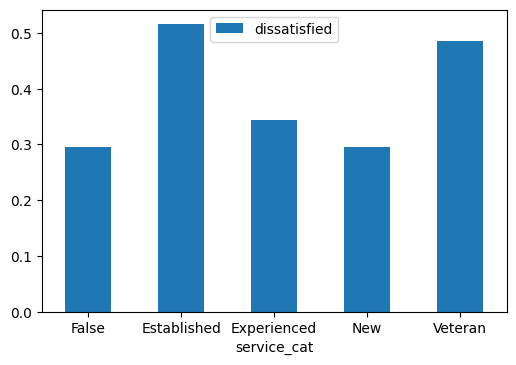

In [39]:
print('\n- Unique values in the dissatisfied column of the combined updated dataframe:\n', combined_updated['dissatisfied'].value_counts(dropna=False))
combined_updated.fillna(False, inplace=True)
#print('\n- Unique values in the dissatisfied column of the combined updated dataframe:\n', combined_updated['dissatisfied'].value_counts(dropna=False))

pv_combined = combined_updated.pivot_table('dissatisfied', 'service_cat')
pv_combined.plot(kind='bar', rot=0)

We aggregated the dissatisfied column and calculate the number of people in each group dissatisfied in each service_cat group. We plotted it after.